# COGS 108 - Examining Housing Prices in Orange County 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Looking at data accquired from the real estate brokerage website Redfin to understand what factors affect listing prices in Orange County as of November 2021.

# Names

- Nick DeGroot (A15948734)
- Ethan Wadsworth (A15901022)
- Dario Aburto Rodriguez (A15429735)
- Gregory Boscaiu (A15512055)

<a id='research_question'></a>
# Research Question

How do variables such as home square footage, age of house, and proximity to schools and the coast line affect listing prices for homes in Orange County? 

<a id='background'></a>

## Background & Prior Work

In recent years, the price of housing throughout California has gone up significantly, especially within the last year in Orange County as the median listing prices in Orange County increased from 839,900 from November 2020 to 890,000 in Novemeber 2021. Orange County has long been a sought-after housing market due to its abundance of suburban housing and its proximity to Los Angeles and other natural amenities such as the ocean and mountains. However, the housing stock of Orange County is not homogenous and there exists a wide disparity in the type of housing currently constructed and for sale in Orange County for prospective homeowners. With this in mind, we want to understand and determine what factors about a housing listing influence its listing price the most. For this, we have chosen to look at the following variables: the home’s square footage, the age of the house, and the location of the house relative to the nearest schools. Orange County alone has 12 school disticts within the top 100 in the state of California, making it a very attractive location for families looking to provide their children with a quality education. These factors could have a significant effect on the overall listing price of homes within the county.

For prior work on this topic, Gregory has worked before with housing data in different situations. He first worked with housing data with the goal of prediction at a Data Hackathon, hosted by UC San Diego’s Data Science Student Society in Winter Quarter 2020, where he used housing data in San Diego from 1970. More recently, Gregory has worked with data regarding housing in San Diego County for his job at the San Diego Association of Governments to map and display trends in housing costs in San Diego throughout the 2010s. 

References (include links):
- [Orange County Housing Overview](https://www.realtor.com/realestateandhomes-search/Orange-County_CA/overview)
- [Niche Best School Districts in California](https://www.niche.com/k12/search/best-school-districts/s/california/)

# Hypothesis


We predict that the age of the house will have a negative relationship with a home’s listing price while the variables of home square footage and the proximity to desirable geographies will have a positive relationship with a home’s listing price. The day on market is expected to have a negative relationship with listing price because the longer a home is on a market, this means that this property may not be as desirable compared to other properties so it will not be as in high demand compared to other homes and therefore will have a lower listing price. As well, we expect the age of the house to be negatively associated with listing prices because an older house may not have all the modern amenities that current homeowners desire, meaning they are less sought after compared to more modern homes. For home square footage, we would expect a larger house to cost more than a smaller house due to the price of land in Orange County, therefore a higher square footage would mean a higher listing price. For homes that are located close to different public schools,from elementary to high school, we would expect the listing prices to be higher as well since being close to schools makes a new home more desirable for families with school age children. 

# Dataset(s)


- Dataset Name: Orange County Housing November 1
- Link to the dataset: [Link](https://github.com/COGS108/Group022-Fa21/blob/master/Orange%20County%20Housing%20November%201st.csv)
- Number of observations: 2401

The dataset we will be using is data on all the current housing listings in Orange County, California collected on November 1st, 2021, from the real estate brokerage website Redfin. Our dataset contains 2401 observations of active listings.  Some of the columns the dataset has include the address of the listing, the zip code the listing is in, square footage in feet, the year the house was built among other columns. 

- Dataset Name: California School Campus Database (CSCD)
- Link to the dataset: [Link](https://www.californiaschoolcampusdatabase.org/)
- Number of observations: 615

The first supplimentary dataset we'll be using is data on the current school campuses in all of California, last updated March 2021.

- Dataset Name: US Census Cartographic Boundary Files
- Link to the dataset: [Link](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html/)
- Number of observations: 56

The last supplimentary dataset we'll be using is boundary data for all US states. 


# Setup

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
df_home = pd.read_csv('Orange County Housing November 1st.csv')
df_edu = gpd.read_file('CSCD_2021.gdb.zip')
df_state = gpd.read_file('./cb_2018_us_state_500k.zip')

# Data Cleaning

The general process that we followed when cleaning the data is as follows:
1. Perform initial filtering steps such as renaming columns, removing unnecessary columns, and repositioning columns
2. Check and find which columns contain missing data as well as the frequency of the missing data for each column
3. Filter missing data by either removing observations or generating new data to fill the missing cells

Step 3 is performed multiple times for separate columns, where individual decisions are made regarding how to handle the missing data for that column.


## Initial Filtering
Before going into cleaning up the data, we first performed some simple operations to make accessing and working with the data much easier. These initial steps are as follows:
1. Convert column names from all caps to lowercase
2. Filter the dataset to only include the columns we wanted to use as our independent variables
3. Move the price column to the very last column

Converting the columns to lowercase was done simply because the columns name were initially in all caps and having to type the column name in all caps whenver we wanted to use the dataset would be somewhat tedious.

In [4]:
# convert all columns to lowercase
df_home = df_home.rename(str.lower, axis='columns')

Because we only want to look at square feet, location, age of the house, and price, we should simply remove all of the other columns from the dataset completely. Location data such as latitude and longitude was kept as well just in case it was needed for later analysis. The ```'location'``` column was also removed because it did not provide any additiona infomration that the ```'city'``` didn't already provide. The ```'city'``` column also presented the same information in a much cleaner format.

In [5]:
# filter df_home to only include these columns
df_home = df_home[['city', 'state or province', 'zip or postal code', 'price', 'square feet', 'year built', 'latitude', 'longitude']]
df_home.rename(
    {
        'zip or postal code': 'zip',
        'square feet': 'sq_ft',
        'year built': 'yr_built',
        'state or province': 'state',
    },
    axis=1,
    inplace=True
)

Now if we look at the dataset after the initial filtering it looks like this:

In [6]:
df_home.head()

,city,state,zip,price,sq_ft,yr_built,latitude,longitude
0,Mission Viejo,CA,92692.0,1200000.0,2679.0,2000.0,33.626767,-117.631360
1,Dana Point,CA,92629.0,1300000.0,1994.0,1984.0,33.473968,-117.703151
2,San Clemente,CA,92672.0,3500000.0,2788.0,2017.0,33.421096,-117.612151
3,Laguna Hills,CA,92653.0,649000.0,1320.0,1976.0,33.623080,-117.738409
4,Anaheim,CA,92808.0,635000.0,1357.0,1996.0,33.853034,-117.744168


## Check Columns With Missing Data


In [7]:
df_home.isnull().sum()

city           2
state          1
zip            1
price          1
sq_ft        154
yr_built     149
latitude       1
longitude      1
dtype: int64

We can see that all of the columns have at least one cell with missing data. We will address these missing data points in the following cells.

## Removing Cells With Missing Prices
Because price is our dependent variable, we should first take a look at the missing data for the price columm and the datatype of the price column:

In [8]:
# check datatype and missing data rows
print('price is type: ', df_home.dtypes['price'])
df_home[df_home['price'].isnull()]

price is type:  float64


,city,state,zip,price,sq_ft,yr_built,latitude,longitude
2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that price is of type ```float64``` which is great because we don't have to do anything extra there. We also see that there is in fact only a single row that does not have a price, and that the row is just a full row of ```NaNs```. So let's remove it.

In [9]:
# remove the NaN row from the dataset
df_home = df_home[~df_home['price'].isnull()].reset_index(drop=True)

## Filtering Year Built
The next thing that we filter by is year built.

In [10]:
# check missing values
df_home['yr_built'].isnull().value_counts()

False    2252
True      148
Name: yr_built, dtype: int64

While there are quite a few rows missing data in the ```''year built'``` column, there is no easy way to synthesize new data for those missing spots because it is temporal data. So we can just remove those rows.

In [11]:
df_home = df_home[~df_home['yr_built'].isnull()].reset_index(drop=True)

Running a quick null check shows that the only column with values still missing is the square feet column.

In [12]:
df_home.isnull().sum()

city          0
state         0
zip           0
price         0
sq_ft        26
yr_built      0
latitude      0
longitude     0
dtype: int64

## Cleaning the Square Feet Column
To clean up the `sq_ft` column which only has 26 missing values, we can populate the missing data with the mean square feet by city. We first get the mean square feet of houses by city. We then convert these means into a dictionary where the keys are the city and the values are the square feet mean for that city. We then populate the dataframe with the calculated means.

In [13]:
# get square feet means by city 
sq_ft_means = df_home.groupby('city', as_index=False)['sq_ft'].mean()

In [14]:
# convert the dataframe to a key map with the keys as city and val as mean
sq_ft_means_map = sq_ft_means.set_index('city').T.to_dict('records')[0]

In [15]:
# grab the indices in the df_home with NaN in the square feet column
indices = df_home[df_home['sq_ft'].isnull()].index.tolist()

# loop through the indices and fill in the missing data with the mean by city
for index in indices:
    df_home.at[index, 'sq_ft'] = sq_ft_means_map[df_home.iloc[index]['city']]
    

## Cleaning the City Column 
If we want to group data about the listings per city in Orange County, we need to ensure that the city names are standardized in the entire dataset. We will first look at all the unique city names present in the data.

In [16]:
df_home['city'].unique()

array(['Mission Viejo', 'Dana Point', 'San Clemente', 'Laguna Hills',
       'Anaheim', 'Orange', 'Irvine', 'Cypress', 'Newport Beach',
       'La Habra', 'Brea', 'Huntington Beach', 'Fullerton',
       'Coto de Caza', 'Laguna Niguel', 'Garden Grove',
       'San Juan Capistrano', 'Yorba Linda', 'Placentia', 'Santa Ana',
       'Rancho Santa Margarita', 'Tustin', 'North Tustin', 'Seal Beach',
       'Corona del Mar', 'Westminster', 'MISSION VIEJO', 'Aliso Viejo',
       'Costa Mesa', 'Laguna Beach', 'Rancho Mission Viejo',
       'Lake Forest', 'Buena Park', 'Laguna Woods', 'Lakewood',
       'Anaheim Hills', 'Stanton', 'Fountain Valley', 'Ladera Ranch',
       'Villa Park', 'La Palma', 'Newport Coast', 'Midway City',
       'Trabuco Canyon', 'Los Alamitos', 'Rossmoor', 'Sunset Beach',
       'Long Beach', 'Cowan Heights', 'Surfside', 'Silverado Canyon',
       'Modjeska Canyon', 'Foothill Ranch', 'Corona Del Mar'],
      dtype=object)

We can see there are some duplicate city values. Corona Del Mar appears twice in different capitalizations, and Mission Viejo appears twice, where one is all capitalized versus normally formatted. We can fix this and standardize all the city names.

In [17]:
df_home['city'].replace({'Corona del Mar':'Corona Del Mar','MISSION VIEJO':'Mission Viejo'},inplace = True)
df_home['city'].unique()

array(['Mission Viejo', 'Dana Point', 'San Clemente', 'Laguna Hills',
       'Anaheim', 'Orange', 'Irvine', 'Cypress', 'Newport Beach',
       'La Habra', 'Brea', 'Huntington Beach', 'Fullerton',
       'Coto de Caza', 'Laguna Niguel', 'Garden Grove',
       'San Juan Capistrano', 'Yorba Linda', 'Placentia', 'Santa Ana',
       'Rancho Santa Margarita', 'Tustin', 'North Tustin', 'Seal Beach',
       'Corona Del Mar', 'Westminster', 'Aliso Viejo', 'Costa Mesa',
       'Laguna Beach', 'Rancho Mission Viejo', 'Lake Forest',
       'Buena Park', 'Laguna Woods', 'Lakewood', 'Anaheim Hills',
       'Stanton', 'Fountain Valley', 'Ladera Ranch', 'Villa Park',
       'La Palma', 'Newport Coast', 'Midway City', 'Trabuco Canyon',
       'Los Alamitos', 'Rossmoor', 'Sunset Beach', 'Long Beach',
       'Cowan Heights', 'Surfside', 'Silverado Canyon', 'Modjeska Canyon',
       'Foothill Ranch'], dtype=object)

The city names are good to go! We can now proceed to the final checks for the Housing data.

## Ensuring the Data is Now Clean
After performing these filtering operations, we run one last check to make sure the data is now in tidy format easy use.

In [18]:
# check for missing data
df_home.isnull().sum()

city         0
state        0
zip          0
price        0
sq_ft        0
yr_built     0
latitude     0
longitude    0
dtype: int64

All missing data has been successfully removed or filled with new generated data.

In [19]:
df_home.dtypes

city          object
state         object
zip          float64
price        float64
sq_ft        float64
yr_built     float64
latitude     float64
longitude    float64
dtype: object

The datatypes for the dataset are correct, with strictly numerical data being of type ```float64``` and non-numerical data being of type ```object``` for strings.

The data is now clean and ready to use.

# Data Cleaning Part 2: School Data

To better answer the question of whether desirable geographies affect listing prices, we decided to use the California School Campus Database (CSCD). More information on this database can be found [here](https://www.californiaschoolcampusdatabase.org/), but in short the database contains geographic data on every registered school inside California.

In [20]:
df_edu.columns = df_edu.columns.str.lower()
df_edu.columns

Index(['cdscode', 'status', 'charter', 'ed_type', 'level', 'pb_prv_bie',
       'school', 'district', 'county', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'stacked', 'stack_cnt', 'source', 'notes', 'shape_length',
       'shape_area', 'locations', 'cds_uniq', 'gradesoffered', 'gradesserved',
       'partcount', 'geometry'],
      dtype='object')

The first thing we'll do is filter to just active OC schools, since that's our area of interest.

In [21]:
df_edu = df_edu[(df_edu.county == 'Orange') & (df_edu.status == 'Active')]
df_edu.shape[0]

615

This leaves us with 615 schools for analysis. Nice!

Next, we'll notice that `level` has multiple types of education levels: far more then we care to group by.

In [22]:
df_edu.level.value_counts()

Elementary                                                  383
High School                                                  96
Intermediate/Middle/Junior High                              88
Elementary - Intermediate/Middle/Junior High Combination     22
Intermediate/Middle/Junior High - High Combination           13
Elementary - High Combination                                13
Name: level, dtype: int64

Let's distil this down to the basics: Elementary, Middle, and High School.

In [23]:
df_edu['elementary'] = df_edu.level.isin(['Elementary', 'Elementary - Intermediate/Middle/Junior High Combination', 'Elementary - High Combination'])
df_edu['middle'] = df_edu.level.isin(['Intermediate/Middle/Junior High', 'Elementary - Intermediate/Middle/Junior High Combination', 'Elementary - High Combination'])
df_edu['high'] = df_edu.level.isin(['High School', 'Intermediate/Middle/Junior High - High Combination', 'Elementary - High Combination'])

There's one last thing: when working with geospatial data, the coordinate system you're working with is pretty arbitary. Points on the globe can be expressed any number of ways (check out [Spatial Reference Systems](https://en.wikipedia.org/wiki/Spatial_reference_system) and [GeoPandas' Guide](https://geopandas.org/en/stable/docs/user_guide/projections.html) if you're interested!) The only thing we need to be careful of is that our reference system is known across datasets so things like distance calculations can be projected to make sense.

<!-- Since our original dataset is in latitude/longtude,  -->

In [24]:
df_edu.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As you can see, the CSCD uses a California-specific reference system with meters as units. If we tried (~~and we did~~) to use this as is against our known lat/long, distance calculations wouldn't make any sense (the school is 3.2 coordinate units away).

To counter that, let's project our lat/long values into the California-centric reference. After all, a meter-based projection area specific to California will make our calculations easier to understand and more precise. 

In [25]:
df_home = gpd.GeoDataFrame(df_home, geometry=gpd.points_from_xy(df_home.longitude, df_home.latitude), crs='EPSG:4326')
df_home.to_crs(df_edu.crs, inplace=True)
df_home.head(1)

,city,state,zip,price,sq_ft,yr_built,latitude,longitude,geometry
0,Mission Viejo,CA,92692.0,1200000.0,2679.0,2000.0,33.626767,-117.63136,POINT (219837.538 -484811.795)


Much better. Finally, let's drop certain columns so we don't get confused later in our analysis.

In [26]:
df_home.drop(['latitude', 'longitude'], axis=1, inplace=True)
df_edu.drop(
    ['cdscode', 'street', 'state', 'lat', 'long', 'stacked', 'stack_cnt', 'source', 'notes', 'shape_length', 'shape_area', 'locations', 'cds_uniq', 'partcount', 'level', 'gradesoffered', 'gradesserved', 'status'],
    axis=1,
    inplace=True
)
df_edu.reset_index(drop=True, inplace=True)

# Data Cleaning Part 3: State Boundary Data

In [27]:
df_state.columns = df_state.columns.str.lower()
df_state.columns

Index(['statefp', 'statens', 'affgeoid', 'geoid', 'stusps', 'name', 'lsad',
       'aland', 'awater', 'geometry'],
      dtype='object')

Since our analysis is centered around Orange County, we filter our state boundary file to only include California and change the CRS to our established California-centric system.

In [28]:
df_state = df_state[df_state.name == 'California']
df_state.to_crs(df_edu.crs, inplace=True)

Great! We're done. Let's look at our final cleaned data.

In [29]:
df_home.head()

,city,state,zip,price,sq_ft,yr_built,geometry
0,Mission Viejo,CA,92692.0,1200000.0,2679.0,2000.0,POINT (219837.538 -484811.795)
1,Dana Point,CA,92629.0,1300000.0,1994.0,1984.0,POINT (213586.158 -501910.715)
2,San Clemente,CA,92672.0,3500000.0,2788.0,2017.0,POINT (222194.126 -507560.596)
3,Laguna Hills,CA,92653.0,649000.0,1320.0,1976.0,POINT (209913.818 -485463.084)
4,Anaheim,CA,92808.0,635000.0,1357.0,1996.0,POINT (208772.740 -459983.609)


In [30]:
df_edu.head()

,charter,ed_type,pb_prv_bie,school,district,county,city,zip,geometry,elementary,middle,high
0,No,Traditional,Public,El Portal Elementary,Lowell Joint,Orange,La Habra,90631-4451,"MULTIPOLYGON (((187920.144 -451506.528, 187939...",True,False,False
1,No,Traditional,Public,Macy Elementary,Lowell Joint,Orange,La Habra,90631-2473,"MULTIPOLYGON (((187583.746 -450355.630, 187580...",True,False,False
2,No,Traditional,Public,Olita Elementary,Lowell Joint,Orange,La Habra,90631-6223,"MULTIPOLYGON (((187436.066 -452681.974, 187442...",True,False,False
3,No,Traditional,Public,Barton (Clara) Elementary,Anaheim Elementary,Orange,Anaheim,92804-3519,"MULTIPOLYGON (((189730.973 -463758.572, 189731...",True,False,False
4,No,Traditional,Public,Madison (James) Elementary,Anaheim Elementary,Orange,Anaheim,92804-6023,"MULTIPOLYGON (((190018.718 -465135.919, 190019...",True,False,False


In [31]:
df_state.head()

,statefp,statens,affgeoid,geoid,stusps,name,lsad,aland,awater,geometry
16,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((129777.289 -503034.640, 130301..."


# Data Analysis & Results (EDA)

First things first, let's get a sense of our data distrubution.

In [32]:
df_home.describe()

,zip,price,sq_ft,yr_built
count,2252.000000,2.252000e+03,2252.000000,2252.000000
mean,92530.584369,2.255973e+06,2602.883064,1980.698490
std,574.897024,4.428342e+06,2335.244280,22.454241
min,90620.000000,3.500000e+03,1.000000,1880.000000
25%,92630.000000,6.490000e+05,1306.750000,1965.000000
50%,92663.000000,9.999990e+05,1867.000000,1977.000000
75%,92708.000000,2.038750e+06,3038.500000,1999.000000
max,92887.000000,6.500000e+07,34920.000000,2023.000000


While zip codes, latitude, and longitude distibutions don't mean much, we'll take note of the square footage, year built, and price summary statistics.

### Plots

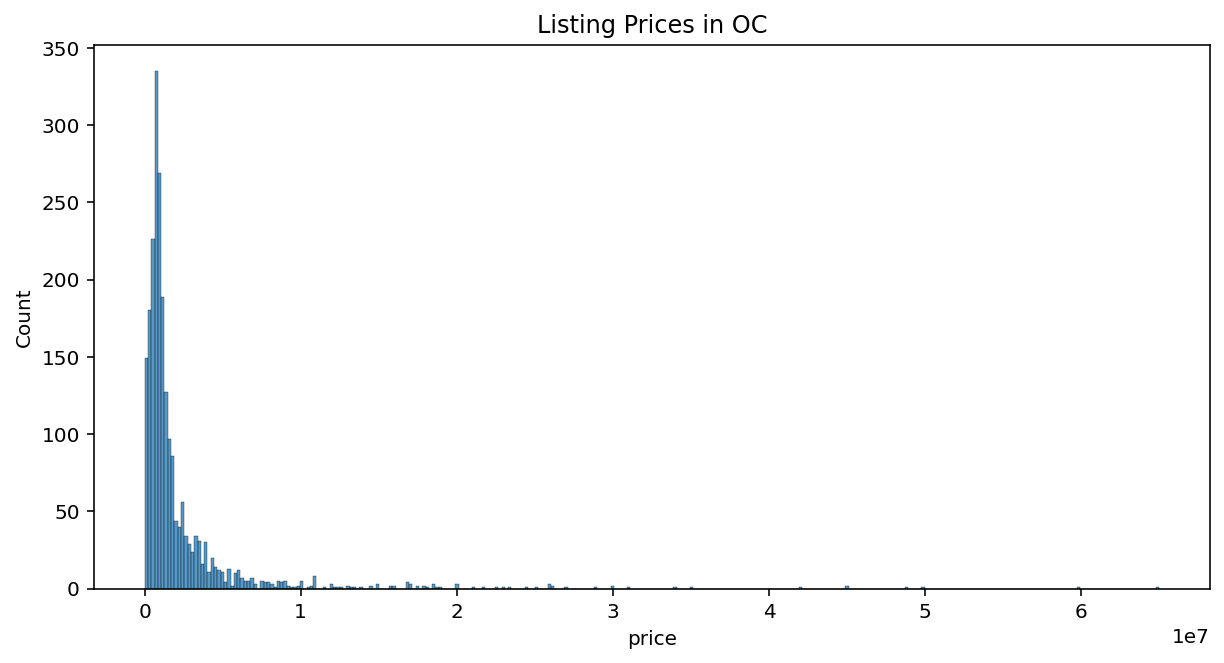

In [33]:
ax = sns.histplot(df_home, x='price')
ax.set_title('Listing Prices in OC');

Figure 1.
Woah - some houses are PRICEY. The vast majority of houses are within the 0 - 1 million dollar price range, but there are still some houses that cost a lot more causing the average to be higher at 2.26 million dollars. Let's define any outliers to be 1.5x the IQR and replot to get a better view of the price of the majority of the houses. 

In [34]:
def calcOutlierRange(data: pd.Series):
    upperQuantile, lowerQuantile = data.quantile([.75, .25])
    iqr = upperQuantile - lowerQuantile
    iqrRange = 1.5 * iqr
    return lowerQuantile - iqrRange, upperQuantile + iqrRange

def isOutlier(point,outlierRange):
    return (outlierRange[0] >= point) or (point >= outlierRange[1])

In [35]:
def plotNonOutliersHist(data: pd.Series, **args):
    dRange = calcOutlierRange(data)
    outliers = data.apply(lambda x: isOutlier(x, dRange))
    dataFiltered = data[~outliers]
    return sns.histplot(x=dataFiltered, **args)

Text(0.5, 1.0, 'Listing Prices in OC (Outliers Removed)')

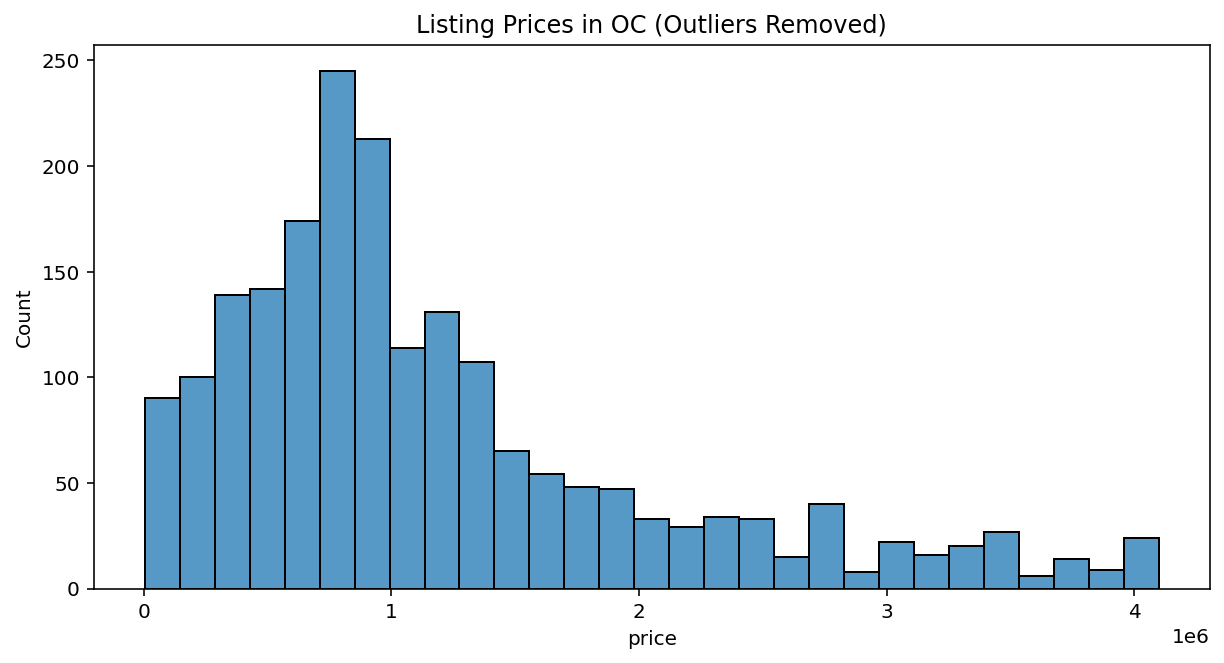

In [36]:
ax = plotNonOutliersHist(df_home.price)
ax.set_title('Listing Prices in OC (Outliers Removed)')

Much better. 

Figure 2. After removing the outliers, the distribution of the vast majority of the listing prices for houses in Orange County becomes clearer. This histogram indicates that the vast majority of house listings in Orange County do not exceed approximately $1.5$ million dollars. However, there are also a significant amount of house listings in Orange County that fall between $1.5$ million dollars and around $4$ million dollars.

We can do the same for our year built and square footage data. We can combine all of what we did above into a single function to make this easier.

In [37]:
def generateHistPlots(data: pd.Series, title: str):
    """
    Generates two plots, one with outliers and one without.
    """
    fig, axs = plt.subplots(2)
    plt.suptitle(title)
    
    sns.histplot(data, ax=axs[0])
    plotNonOutliersHist(data, ax=axs[1])

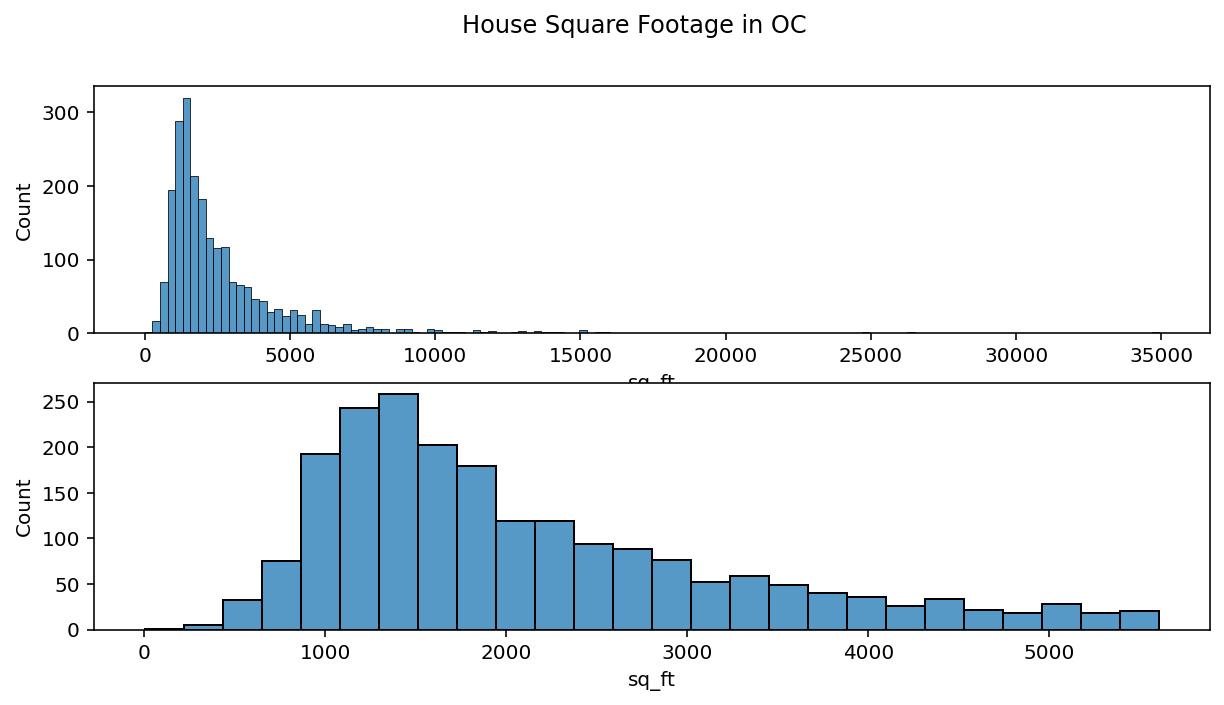

In [38]:
generateHistPlots(df_home.sq_ft, 'House Square Footage in OC')

Figure 3. 
The histogram above shows that most of houses in Orange County have a square footage that lies between 1000 - 3000 square feet. The graph is skewed towards the right, and supports the mean square footage we calculated above being 2602.88 square feet as this mean is slightly above where majority of the houses lie in the square footage distribution. 

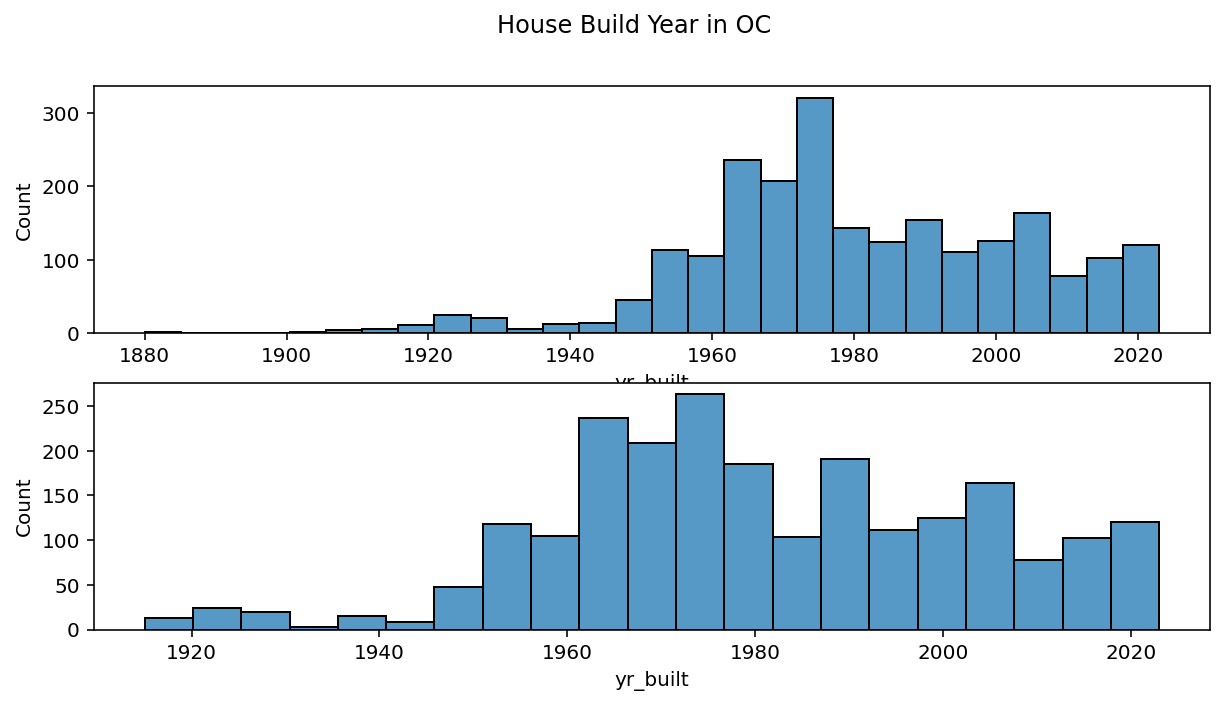

In [39]:
generateHistPlots(df_home.yr_built, 'House Build Year in OC')

That's a little tough to follow, what's easier to comprehend is a home's _age_. Let's add that as a column and replot.

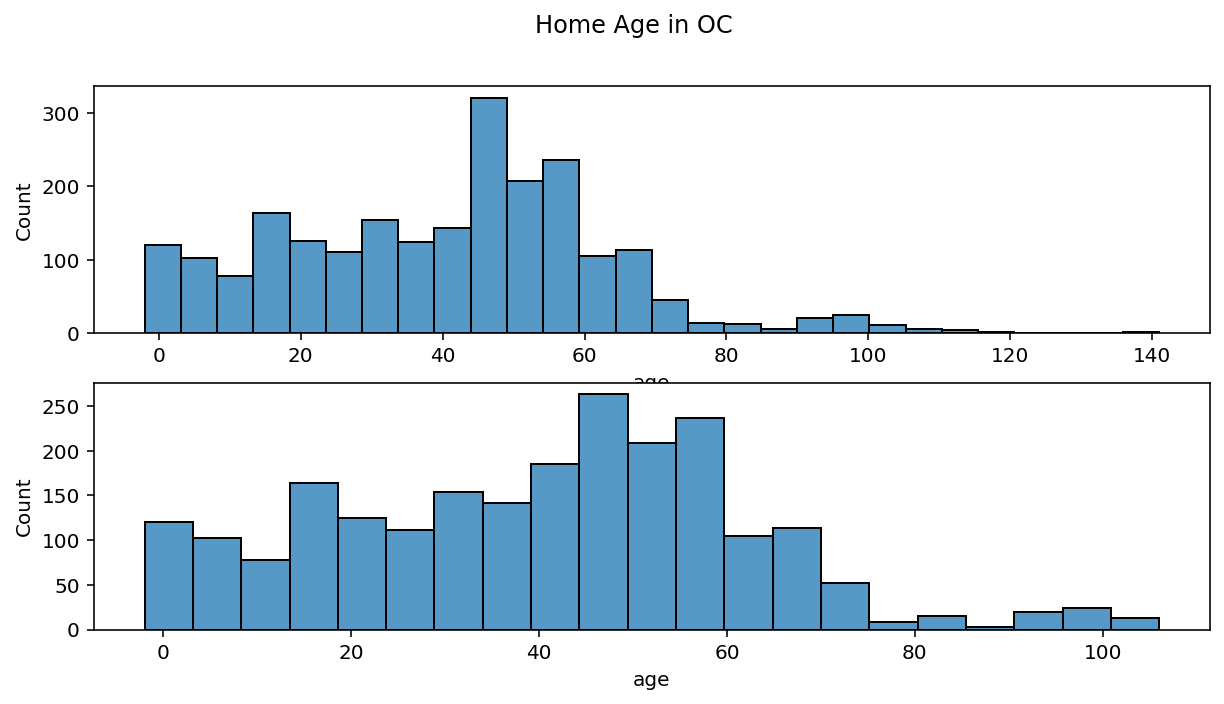

In [40]:
df_home['age'] = 2021 - df_home.yr_built
generateHistPlots(df_home.age, 'Home Age in OC')

Figure 4. After converting the data from the year the house was built to the age of the house in years, the histogram shows that the average age of houses in Orange County is between 40-60 years. This further supports our previous analysis that showed the average year the house was built we found about which was built in 1980, which is 41 years ago. This indicates that most of the houses in Orange County are relatively new, as a much smaller number of houses were built 80 or more years ago. 

## City EDA

We can also do EDA by grouping together listings based on the city they are located in. We will first look at the median listing price in each city in Orange County. We have decided to use the median listing and not the average listing price as the median is less prone to extreme outliers in the data, which is more prevalent in the housing dataset due to the occurance of listings in the tens of millions of dollars.

In [41]:
df_home_price_by_city = df_home.groupby('city')['price'].median().sort_values(ascending = False).reset_index()
df_home_price_by_city.head()

,city,price
0,Newport Coast,9498000.0
1,Corona Del Mar,5495000.0
2,Sunset Beach,4849500.0
3,Laguna Beach,3975000.0
4,Newport Beach,3597500.0


/home/nickthegroot/.cache/pypoetry/virtualenvs/cogs108-lectures-OId_61K_-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Median Listing Price per city in Orange County')

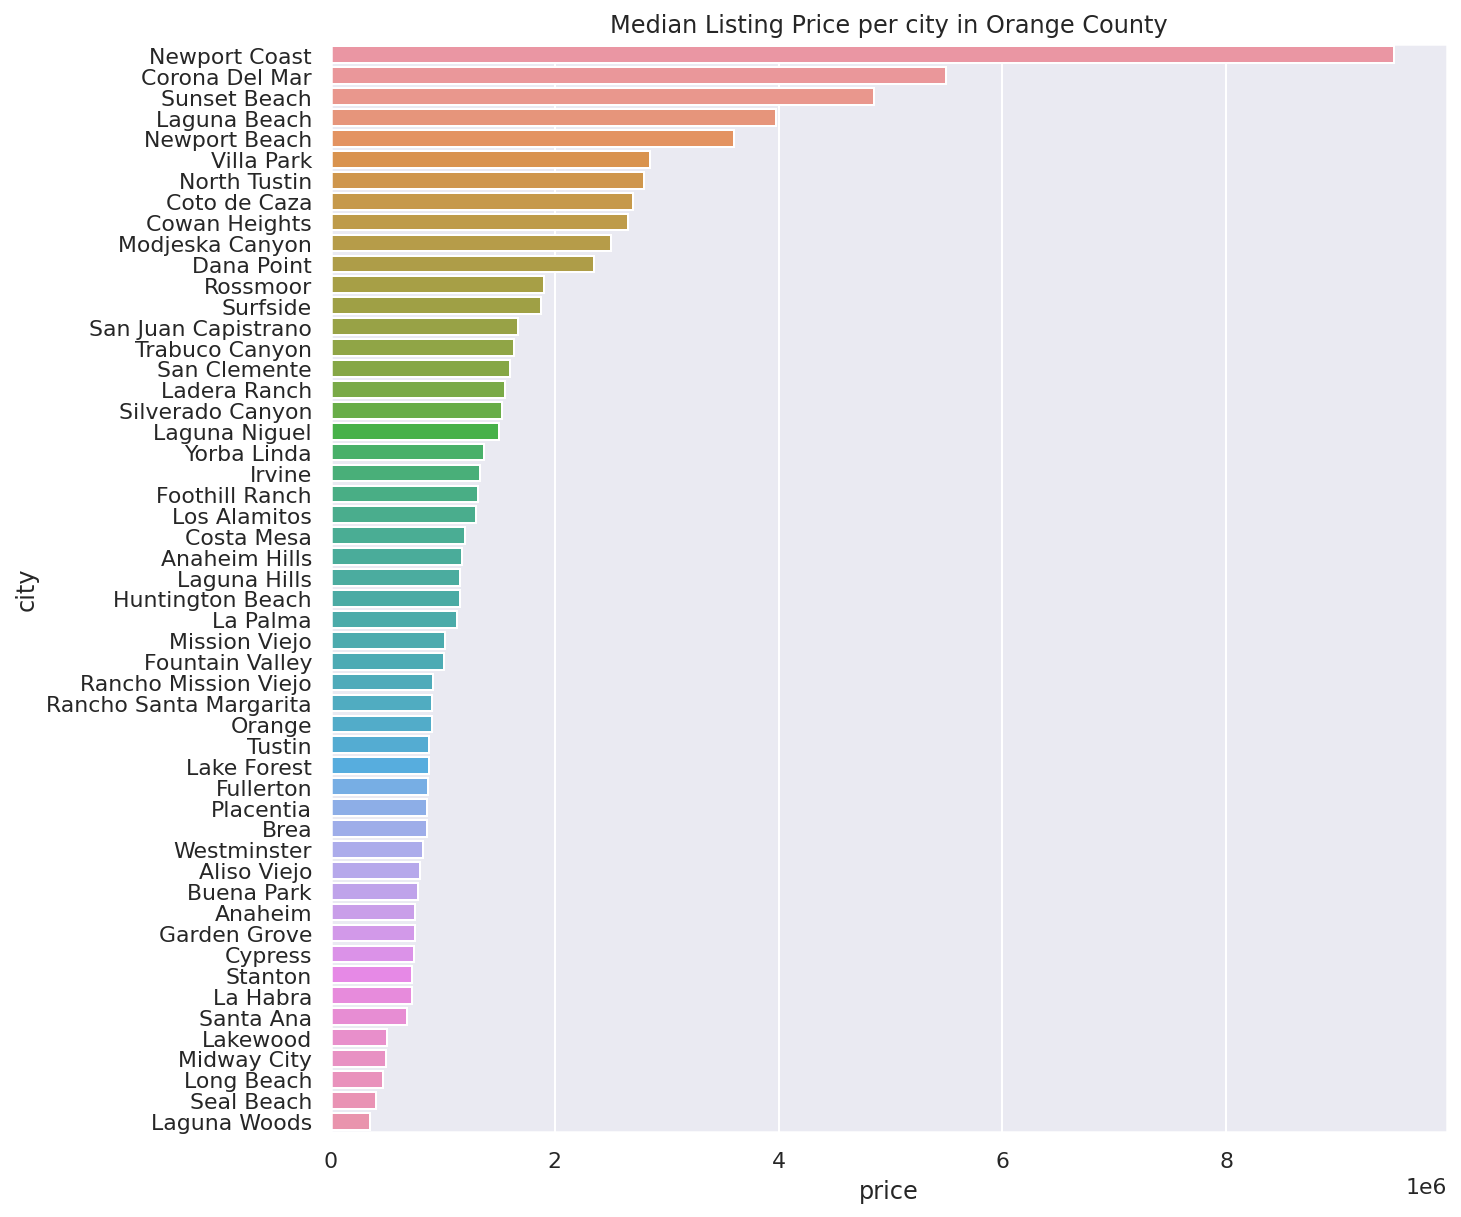

In [42]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot('price','city',data = df_home_price_by_city).set_title('Median Listing Price per city in Orange County')

Figure5. We can see that cities along the coast are very expensive, such as that of Corona Del Mar, Newport Coast, and Newport Beach. However, you also see more inland communities also having a high median listing price, such as North Tustin and Villa Park.

Now we will look at the median square footage for listings in each city.

In [43]:
df_home_sq_ft_by_city = df_home.groupby('city')['sq_ft'].median().sort_values(ascending = False).reset_index()
df_home_sq_ft_by_city.head()

,city,sq_ft
0,Villa Park,5720.5
1,Newport Coast,5608.0
2,Modjeska Canyon,5434.0
3,North Tustin,5066.0
4,Coto de Caza,5000.0


/home/nickthegroot/.cache/pypoetry/virtualenvs/cogs108-lectures-OId_61K_-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Median Square Footage per city in Orange County')

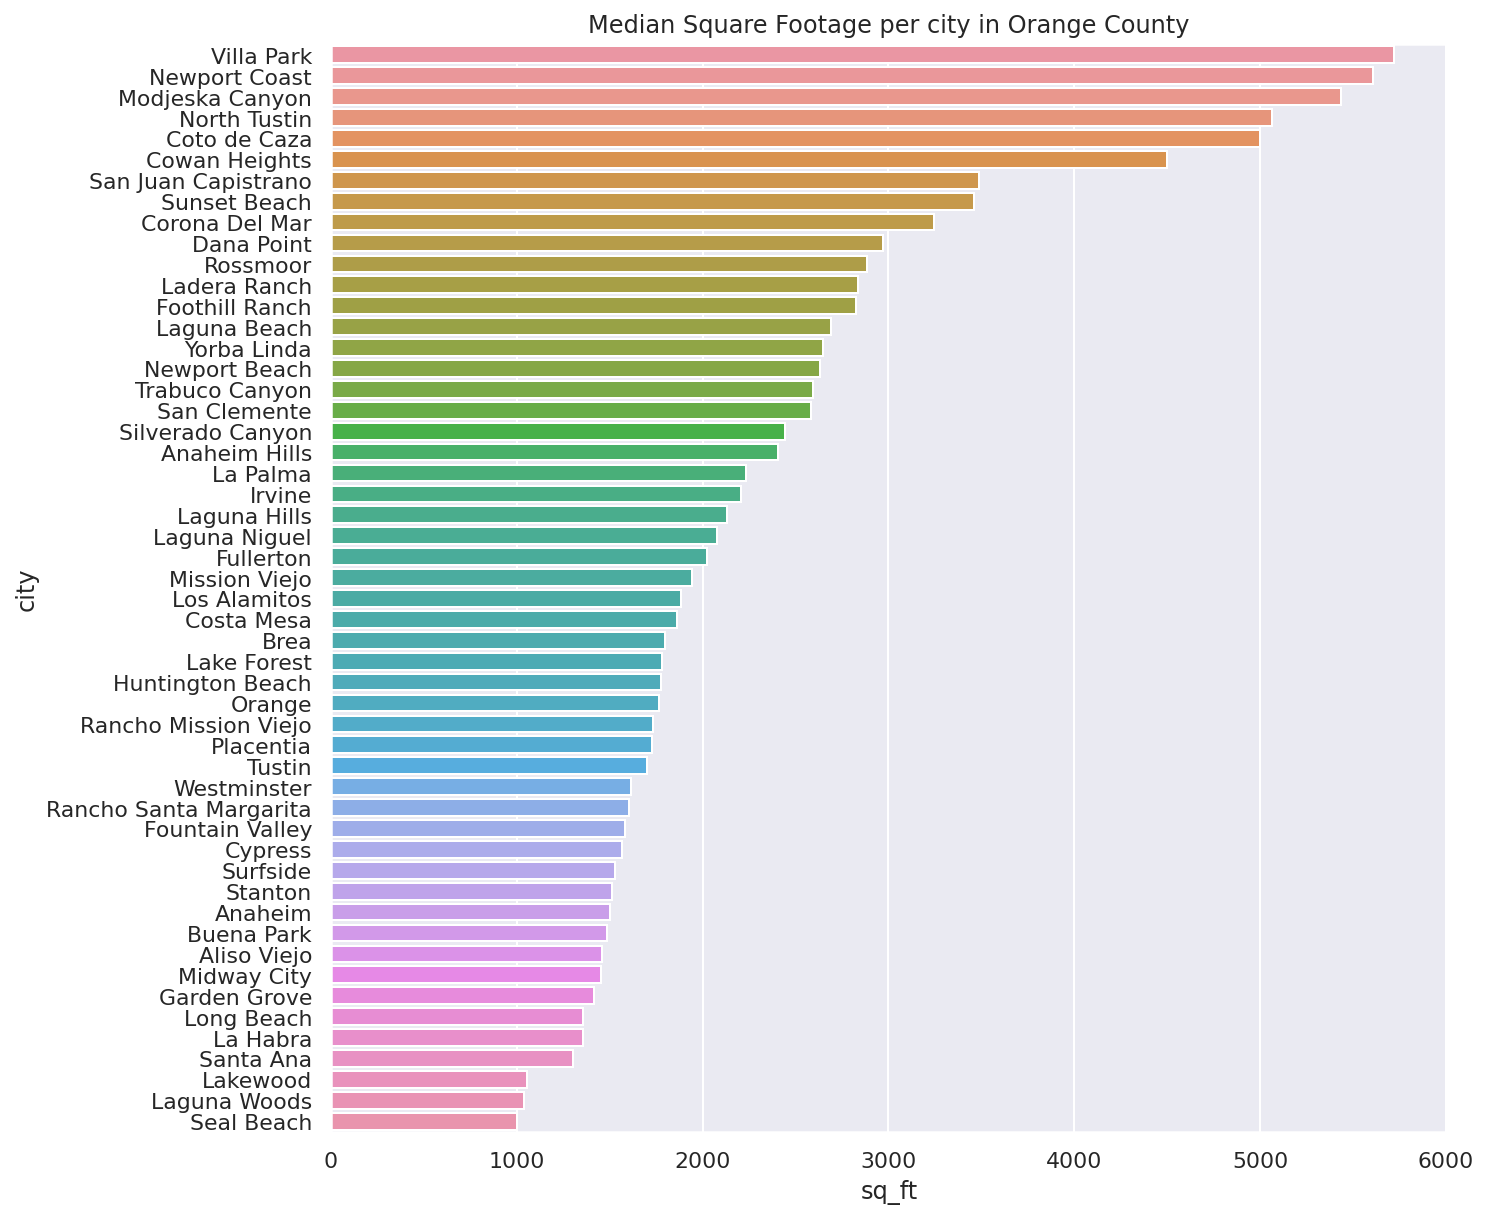

In [44]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot('sq_ft','city',data = df_home_sq_ft_by_city).set_title('Median Square Footage per city in Orange County')

Figure 6. A median square footage of over 5000 square feet is a very large house! From the plot above, we can see that cities that have a high median square footage per property also appear as having a high median listing price as well.

Finally, we will look at the median age of the listings for each city.

In [45]:
df_home_age_by_city = df_home.groupby('city')['age'].median().sort_values(ascending = False).reset_index()
df_home_age_by_city.head()

,city,age
0,Buena Park,63.0
1,Rossmoor,61.0
2,Seal Beach,59.0
3,Los Alamitos,57.0
4,Orange,57.0


/home/nickthegroot/.cache/pypoetry/virtualenvs/cogs108-lectures-OId_61K_-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Median Housing Age per city in Orange County')

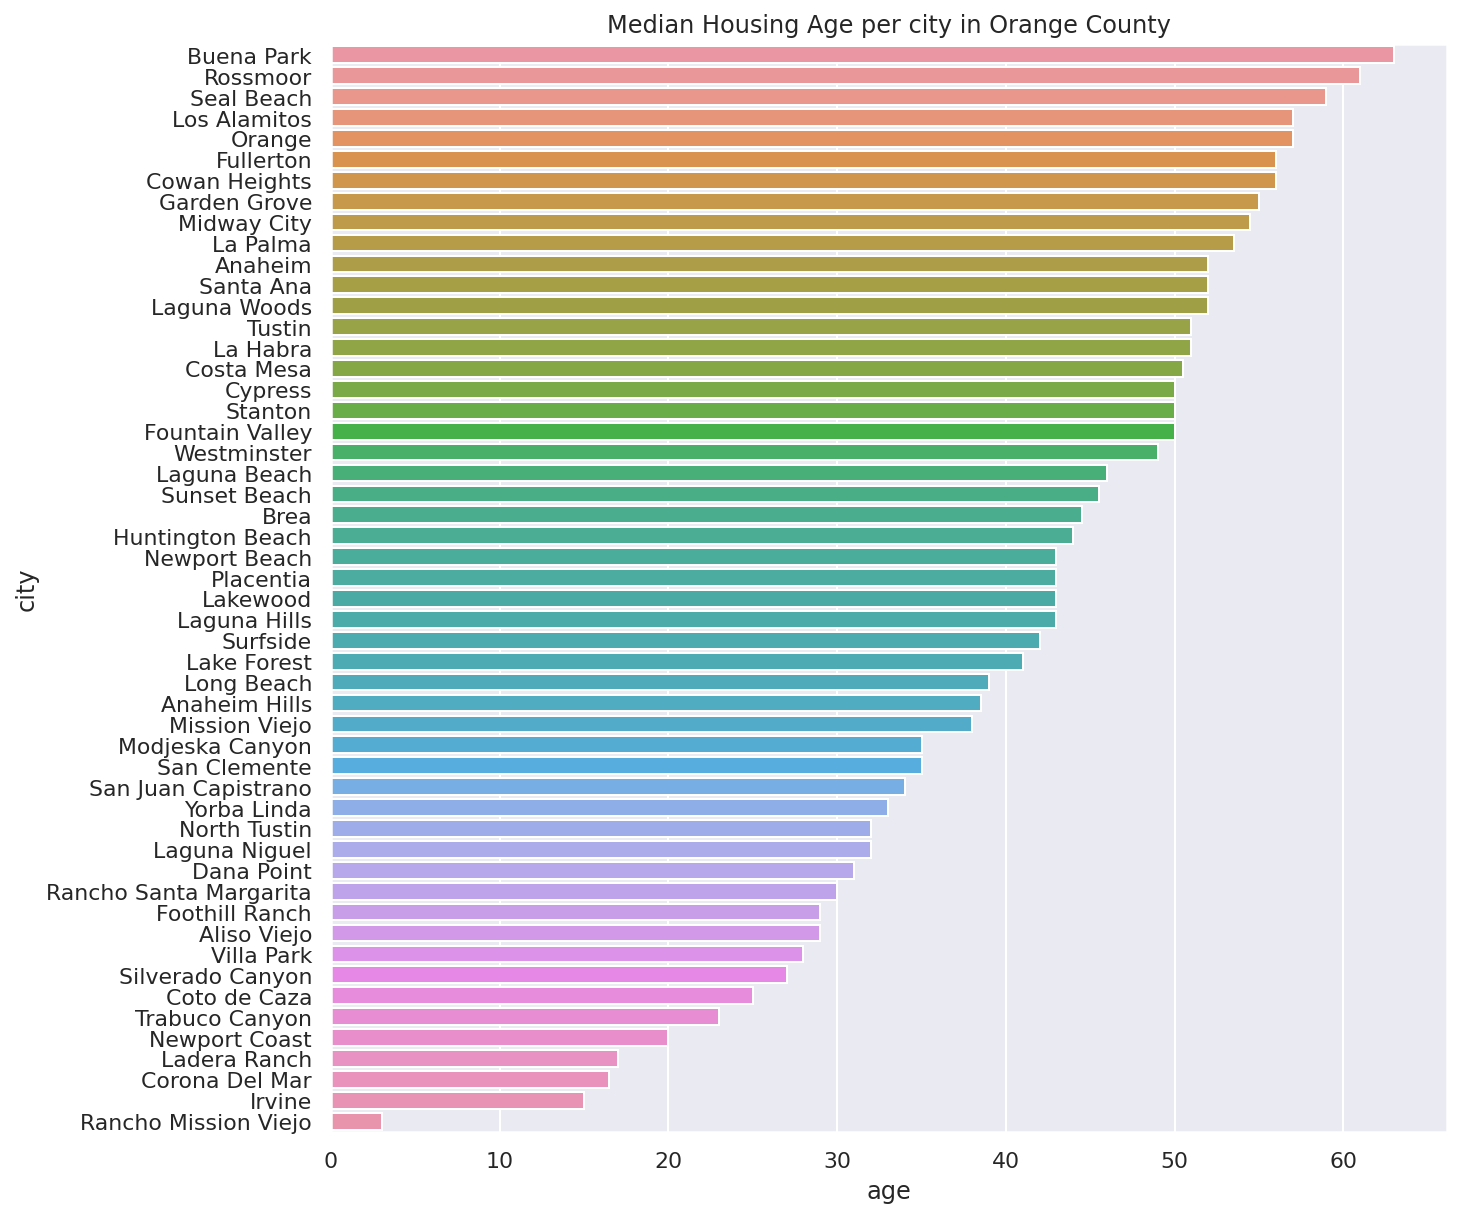

In [46]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot('age','city',data = df_home_age_by_city).set_title('Median Housing Age per city in Orange County')

Figure 7. Having a median age of over 60 means that the median property in that city was constructed back in the 1960s! For a local context, cities like Orange, Fullerton, Santa Ana, and other inland cities in what is referred to as "North Orange County" typically have an older housing stock since they were primarily settled before World War II and immediately after in the post war period. On the contrary, cities located in what is considered "South Orange County" such as Irvine, Aliso Viejo, and Ladera Ranch are home to more recent housing developments, which explain their younger median housing age. The city of Aliso Viejo was only incorporated as a city in 2001! 

## Geospatial EDA

First, let's check out where the houses are on a map. It's generally easier to view geospatial data on a map, so let's start by doing that. This map is interactive! Feel free to hover over any home and get see what attributes it has.

In [47]:
df_home.explore()

Next, let's check out where the schools are located.

In [48]:
df_edu.explore()

We can also view them together, although not in the interactive format above.

In [49]:
edu_clr, home_clr, *_ = sns.color_palette()
legend = {
    'School': edu_clr,
    'Home': home_clr,
}

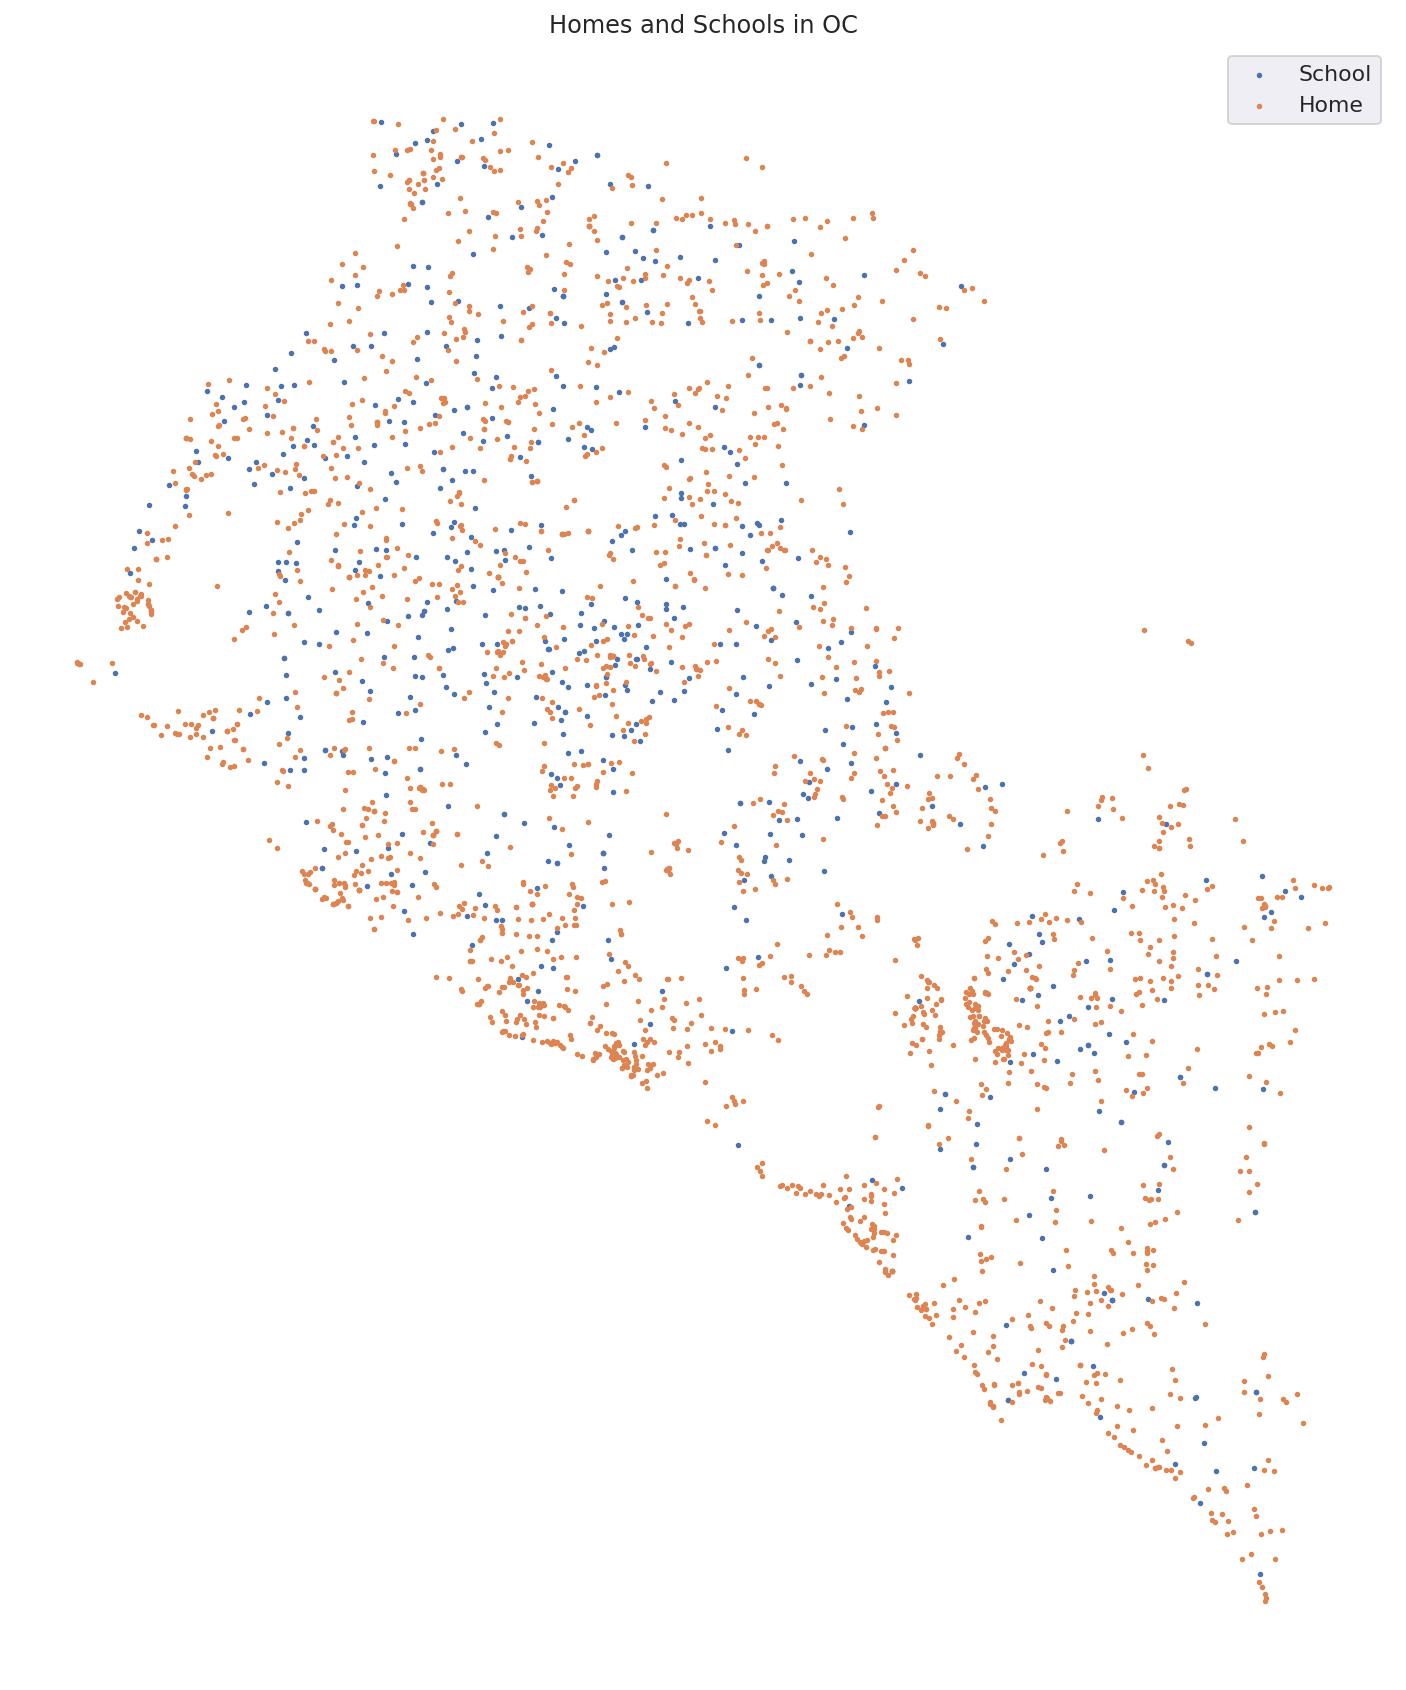

In [50]:
ax = df_edu.centroid.plot(color=edu_clr, markersize=3, figsize=[15, 15])
df_home.plot(ax=ax, color=home_clr, markersize=3)
ax.set_axis_off()
ax.legend(legend)
ax.set_title('Homes and Schools in OC');

Figure 8. The above map shows homes as orange dots and schools as blue dots in Orange County. As in most cities, there are significantly more homes than schools in Orange County. The concentration of homes is generally denser in northern Orange County and along the coastline in the western part of Orange County.

Below we are calculating the distance of elementary, middle , and high schools from houses in Orange County. 

In [51]:
df_elem = df_edu[df_edu.elementary]
df_mid = df_edu[df_edu.middle]
df_high = df_edu[df_edu.high]

df_home['elem_dist'] = df_home.geometry.apply(lambda x: df_elem.geometry.distance(x).min())
df_home['mid_dist'] = df_home.geometry.apply(lambda x: df_mid.geometry.distance(x).min())
df_home['high_dist'] = df_home.geometry.apply(lambda x: df_high.geometry.distance(x).min())

In [52]:
df_home[['elem_dist', 'mid_dist', 'high_dist']].describe()

,elem_dist,mid_dist,high_dist
count,2252.000000,2252.000000,2252.000000
mean,866.453165,1822.872205,1893.567530
std,687.400758,1347.277790,1413.588881
min,0.000000,5.335896,10.988907
25%,384.509807,864.346772,864.957341
50%,689.708213,1460.853515,1565.205376
75%,1171.815495,2451.390449,2565.708029
max,7787.217654,11529.877372,10381.381659


This seems to line up with what we would've assumed coming into this.
- The average distance to an elementary school is <1km.
- The average distance to an middle school is ~1.8km.
- The average distance to an high school is ~1.9km.

One thing we can also do is calculate the distance to the shore.

In [53]:
df_home['shore_dist'] = df_home.geometry.apply(lambda x: df_state.geometry.boundary.distance(x))
df_home['shore_dist'].describe()

count     2252.000000
mean     11678.376316
std       9062.477687
min          9.648479
25%       3291.758185
50%      10420.548294
75%      18240.562637
max      35995.678674
Name: shore_dist, dtype: float64

Once again, this seems to line up with what we would've assumed coming into this.
- The average distance to the shore is ~11.7km
- The median distance is slightly under that at ~10.4km.

In [54]:
df_home.corr()

,zip,price,sq_ft,yr_built,age,elem_dist,mid_dist,high_dist,shore_dist
zip,1.000000,0.067921,0.101633,0.104997,-0.104997,0.034432,-0.064422,-0.085055,0.047888
price,0.067921,1.000000,0.644152,0.199647,-0.199647,0.253601,0.308657,0.229861,-0.278976
sq_ft,0.101633,0.644152,1.000000,0.266859,-0.266859,0.173696,0.187502,0.137365,-0.104429
yr_built,0.104997,0.199647,0.266859,1.000000,-1.000000,0.143549,0.158391,0.221875,-0.062902
age,-0.104997,-0.199647,-0.266859,-1.000000,1.000000,-0.143549,-0.158391,-0.221875,0.062902
elem_dist,0.034432,0.253601,0.173696,0.143549,-0.143549,1.000000,0.477460,0.345525,-0.215286
mid_dist,-0.064422,0.308657,0.187502,0.158391,-0.158391,0.477460,1.000000,0.645643,-0.254225
high_dist,-0.085055,0.229861,0.137365,0.221875,-0.221875,0.345525,0.645643,1.000000,-0.103657
shore_dist,0.047888,-0.278976,-0.104429,-0.062902,0.062902,-0.215286,-0.254225,-0.103657,1.000000


Running a correlation between the the distance from the homes we see that there are not any strong correlations between zip code, price, square footage, year built, age, and distance of homes to elementary, middle, and high schools. This shows that the distance from homes schools do not play a large role in how much a house in Orange County costs, since the correlations between price and distance to elementary, middle, and high schools are 0.25, 0.31, and 0.23 respectively. On the other hand, there is a positive correlation of 0.64 between price and square footage which we expected.  

In [55]:
y, X = patsy.dmatrices('price ~ C(zip)', df_home)
mod = sm.OLS(y, X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     10.82
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          3.27e-119
Time:                        18:14:24   Log-Likelihood:                -37235.
No. Observations:                2252   AIC:                         7.465e+04
Df Residuals:                    2160   BIC:                         7.518e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.637e+05   9.37e+0

Above an OLS regression was ran on the data set that compares price of houses by their zip codes. Again, there are not any strong correlations between between the price of houses and their zip codes. Although some of the zip codes have an extremely low p-value when correlated with price, most of them have a high p-value. Since price and zip code do not seem to be correlated it is likely that some of the zipcodes that have an extremely low p value are false positives. In addition, the r-squared value is 0.313, indicating that there is likely at best, only a weak relationship between zip code and house price if any at all.

In [56]:
y, X = patsy.dmatrices('price ~ city', df_home)
mod = sm.OLS(y, X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     18.09
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          7.51e-131
Time:                        18:14:24   Log-Likelihood:                -37264.
No. Observations:                2252   AIC:                         7.463e+04
Df Residuals:                    2200   BIC:                         7.493e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Another OSL regression was ran on the same dataset but instead compared the prices of houses and the cities, instead of just zip codes which we did previously. The difference here is that cities can contain multiple zip codes. As a result, we can see that we still get similar results as we did previously with the difference being that our r-squared value is even lower at 0.296. This shows that the price of a house in Orange County does not have a strong relationship with the city its located in. 

In [57]:
y, X = patsy.dmatrices('price ~ sq_ft + age + elem_dist + mid_dist + high_dist + shore_dist', df_home)
mod = sm.OLS(y, X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     351.9
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.04e-318
Time:                        18:14:24   Log-Likelihood:                -36912.
No. Observations:                2252   AIC:                         7.384e+04
Df Residuals:                    2245   BIC:                         7.388e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -8.47e+05   2.46e+05     -3.446      0.0

Lastly, we performed an OLS regression on the same dataset that compared the prices of houses with square footage, age, and the distance from houses to the shore, elementary, middle, and high schools. The results of the OLS regression shows the r-squared value is 0.485, meaning a moderate amount of house prices can be explained by the other variables we explored. Multiple variables in our analysis, such as square footage, and distances from the shore, elementary, middle, and high school all had p-values of 0. Such low p-values indicates that the relationship between these variables and house prices in Orange County are statistically significant, even if these variables are not highly correlated with house prices as shown in an above correlation table. 

We can also gleam a couple of interesting facts from this regression:
- The p-value for age was extremely high at 0.828, meaning that the ages of houses were not related to house prices.
- The distance to each of the schools (elementary, middle, and high) was _positively_ associated with price. This means that the further away a house was to a school, the more it was selling for!

# Ethics & Privacy

In regards to privacy, we need to protect any personal information of the realtors listing the homes for open houses as well as protecting the personal information of the homeowners who are listing their homes on Redfin. When we originally downloaded our data from Redfin, it did not disclose any personal information relating to the realtor or the current home owner such as their names, phone numbers, and other identification. Therefore we are able to protect much of their personal information. However, given the nature of our report in which we are examining homes in Orange County and their location, we can't fully anonymize the exact location of houses since we need that for our analysis, but we can omit the physical address of all the listings in the Redfin for privacy reasons.

# Conclusion & Discussion

From the analysis results, our initial hypothesis was partially correct regarding the factors that can affect house prices in Orange County. We were correct in our guess that there is a positive relationship between the square feet of a house and house price, as you should be paying more for a larger house. The age of the house ended up not having a relationship with the price of houses in Orange County most likely because most of the houses in Orange County were found to be relatively new with an average age of 40-60 years. With a majority of the houses being similar in age as well, it can be reasoned that age is not an important factor in determining house price in Orange County.

What was most surprising was the negative relationship between the proximity to schools and the house price. It is worth mentioning some of the potential reasons for this relationship. Noise from nearby schools could leave some homeowners frustrated over additional distractions when trying to get sleep in the mornings. Traffic in the mornings and in the afternoons after the school day is over could also be a pain point for homeowners trying to get to or come home from work. Lastly, it might be worth thinking about the availability and safety of public transit options such as school and public buses in the area that students could take to go to school that could make proximity not much of an issue for families looking to purchase a new home. 

While many of the variables we explored did not have the relationships we were expecting, the majority of them were still found to be statistically significant when predicting housing prices upon performing regression analysis.

One thing we need to keep in mind about our data is that the data we are using is only one possible segment of all opening listings in Orange County. There might be other listings that are active on other realtor websites such as Zillow, realtor.com, etc, but not present on redfin, meaning our dataset does not show all the current active listings in Orange County. As well, the data we are using constantly changes since houses are sold and added to the market on a frequent basis, meaning that the dataset we currently use that is a snapshot of the active listings from November 1st may become obsolete or inaccurate if we try performing the same analysis 6 months from now for example. Therefore, we need to take into consideration the life span of the data and try to maintain our models with the most up to date data as possible.

# Team Contributions

- Nick DeGroot: Data Cleaning, EDA
- Ethan Wadsworth: Data Cleaning, Conclusion & Discussion
- Dario Aburto Rodriguez: OLS Regression/Analysis 
- Gregory Boscaiu: Background Information, Hypothesis, Ethics & Privacy